# Logistic Regression Model for Diabetes Prediction

# Outline
- [1. Importing Libraries](#1)
- [2. Logistic Regression](#2)
    - [2.1. Problem Statement](#2.1)
    - [2.2. Data Loading](#2.2)
    - [2.3. Data Preprocessing](#2.3)
    - [2.4. Data Visualization](#2.4)
    - [2.5. Data Splitting](#2.5)
    - [2.6. Model Training](#2.6)
    - [2.7. Model Evaluation](#2.7)
    - [2.8. Model Tuning](#2.8)
    - [2.9. Model Deployment](#2.9)
- [3. Random Forest](#3)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement: Predicting the Onset of Diabetes in Patients

**Objective**: The primary objective of this project is to develop a predictive model that can accurately identify individuals at risk of developing diabetes. By leveraging data related to various health metrics and personal characteristics, the model aims to provide early detection and intervention opportunities for healthcare providers.

**Background**: Diabetes is a chronic condition characterized by elevated levels of blood glucose. Early detection and management are crucial to prevent complications and improve quality of life. However, timely diagnosis remains a challenge.

**Data**: The dataset consists of medical records for individuals, with features including:
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration
- **BloodPressure**: Diastolic blood pressure
- **SkinThickness**: Triceps skinfold thickness
- **Insulin**: 2-Hour serum insulin
- **BMI**: Body mass index
- **DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history
- **Age**: Age in years
- **Outcome**: Presence of diabetes (1) or absence (0)

**Approach**:
1. **Data Exploration and Preprocessing**: Explore and preprocess the dataset, including handling missing values, scaling features, and splitting the data into training and test sets.
2. **Model Building**: Train a logistic regression model (or other suitable algorithms) to predict the onset of diabetes based on the given features.
3. **Model Evaluation**: Evaluate the model's performance using appropriate metrics, such as accuracy, precision, recall, and ROC curve.
4. **Interpretation and Deployment**: Interpret the results, understand the importance of each feature, and consider deploying the model if applicable.

**Outcome**: The successful completion of this project will result in a predictive model capable of assisting healthcare providers in early detection and intervention for individuals at risk of diabetes. It can be a valuable tool in personalized healthcare and preventive medicine.

In [2]:
# load the dataset
data = pd.read_csv('/workspaces/ML_Projects-/data/diabetes.csv')

In [3]:
# describe the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# There are missing values in the dataset.
# Imputating the missing values with median of the column.

# Alayzing zeros for glucose, blood pressure, skin thickness, insulin, bmi and diabetes pedigree function

zero_glucose_count = len(data[data['Glucose'] == 0])

# Imputing zero values with median
non_median_glucose = data[data['Glucose'] != 0]['Glucose'].median()
data['Glucose'] = np.where((data['Glucose'] == 0), non_median_glucose, data['Glucose'])

# A similar approach can be used for other columns as well to impute zero values with median using function

def impute_zero_values_with_median(data, column):
    non_median_value = data[data[column] != 0][column].median()
    data[column] = np.where((data[column] == 0), non_median_value, data[column])
    return data

columns = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    data = impute_zero_values_with_median(data, column)


# Data Vizuallization

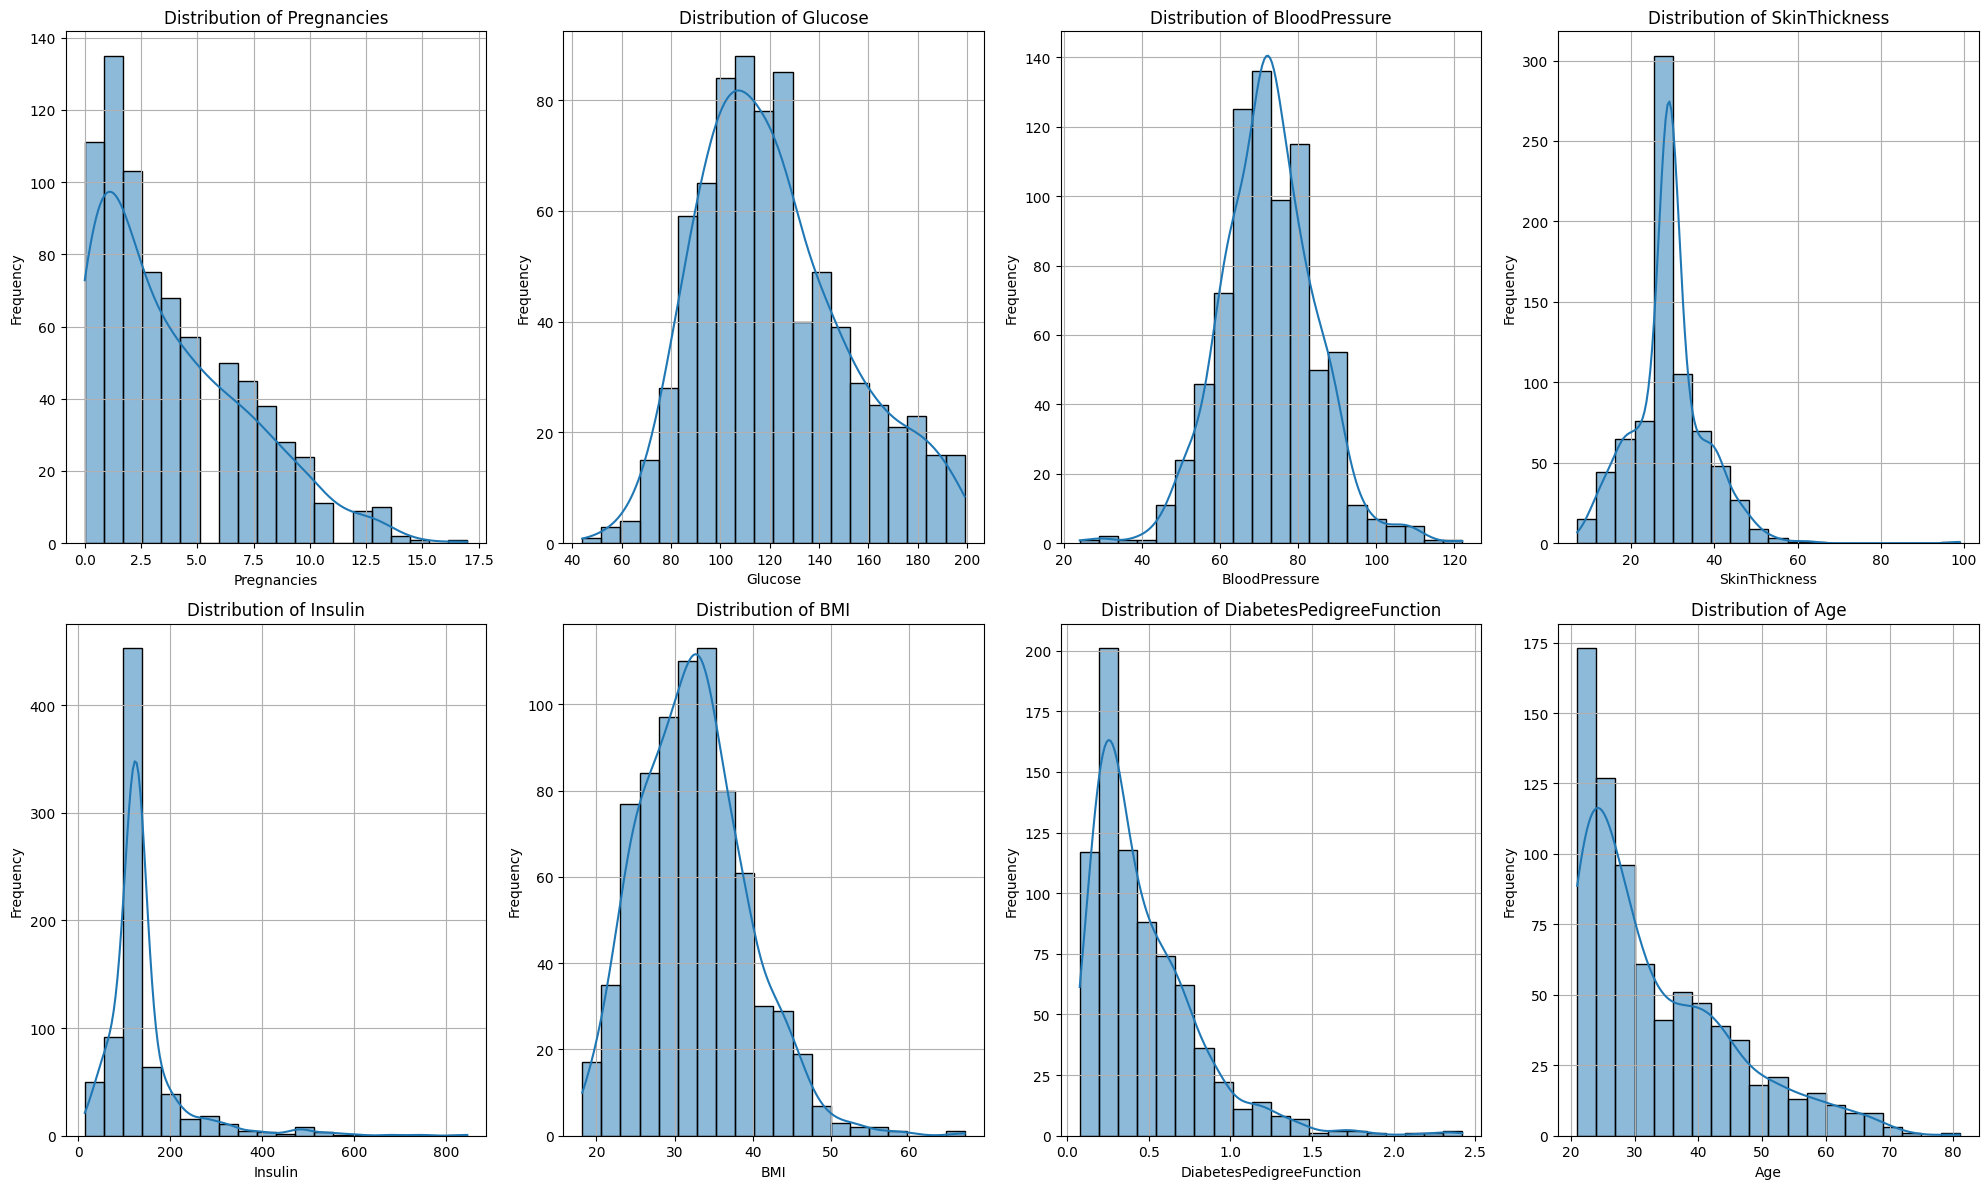

In [5]:
# Plot histograms for each feature (excluding the target variable 'Outcome')
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set the grid size (2 rows, 4 columns)
rows, cols = 2, 4

# Set the figure size
plt.figure(figsize=(20, 12))

# Loop through the features and create a subplot for each
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots
plt.show()

Now we have the visualizations for the eight features in the diabetes dataset. Here are the interpretations for each:

1. **Pregnancies**: 
   - Distribution is right-skewed, with most women having fewer pregnancies.
   - There is a long tail, indicating that a few women have had many pregnancies.

2. **Glucose**: 
   - Distribution appears approximately normal, with a slight right skew.
   - Most glucose levels are centered around the median value, but there are some outliers on the higher end.

3. **Blood Pressure**: 
   - Distribution appears approximately normal.
   - Most blood pressure readings are within a standard range, with few extreme values.

4. **Skin Thickness**: 
   - Distribution is right-skewed.
   - Most values are clustered towards the lower end, with a few higher values.

5. **Insulin**: 
   - Highly right-skewed distribution.
   - Most insulin levels are low, with a long tail indicating some very high values.

6. **BMI**: 
   - Distribution appears approximately normal with a slight right skew.
   - Most BMI values are clustered around the median, representing typical body mass index measurements.

7. **Diabetes Pedigree Function**: 
   - Highly right-skewed distribution.
   - Most values are close to zero, with a few higher values. This variable reflects genetic influence and is typically lower for most individuals.

8. **Age**: 
   - Right-skewed distribution.
   - Most of the subjects are younger, with a gradual decrease in frequency as age increases.

### Summary:
- The histograms provide insights into the underlying distributions of the features, highlighting patterns, skewness, and potential outliers.
- Understanding these distributions can inform preprocessing steps, such as scaling or transformation, and can guide modeling choices.
- Right-skewed distributions in several features might benefit from transformations (e.g., logarithm) to achieve a more normal distribution, especially if linear models are to be applied.
- The KDE (Kernel Density Estimation) lines provide a smoothed view of the distribution, making it easier to identify the overall shape.

In [6]:
# check the data types of the features
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

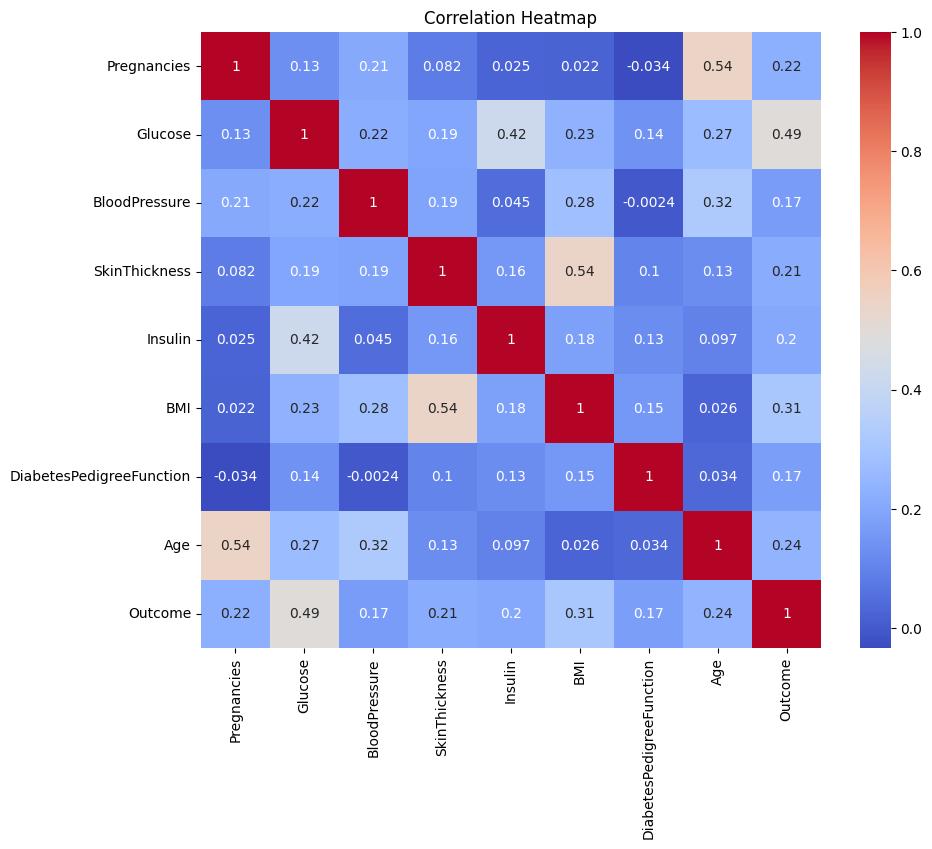

In [10]:
# Plotting Scatter Plots and correlation matrix for understanding the relationship between the features
corr_features = features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
correlation_matrix = data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



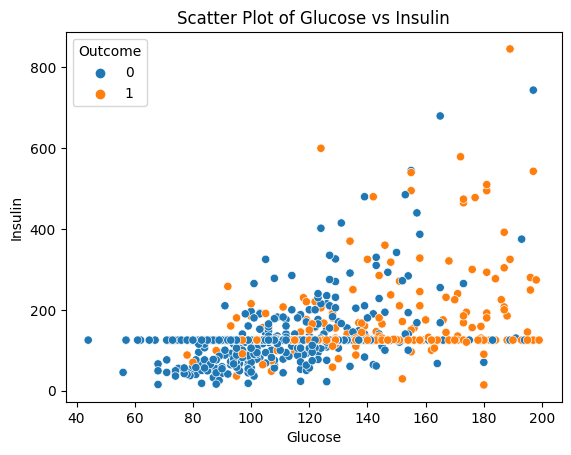

In [8]:
# Scatter Plot for Specific Pair
sns.scatterplot(x="Glucose", y="Insulin", hue="Outcome", data=data)
plt.title("Scatter Plot of Glucose vs Insulin")
plt.show()


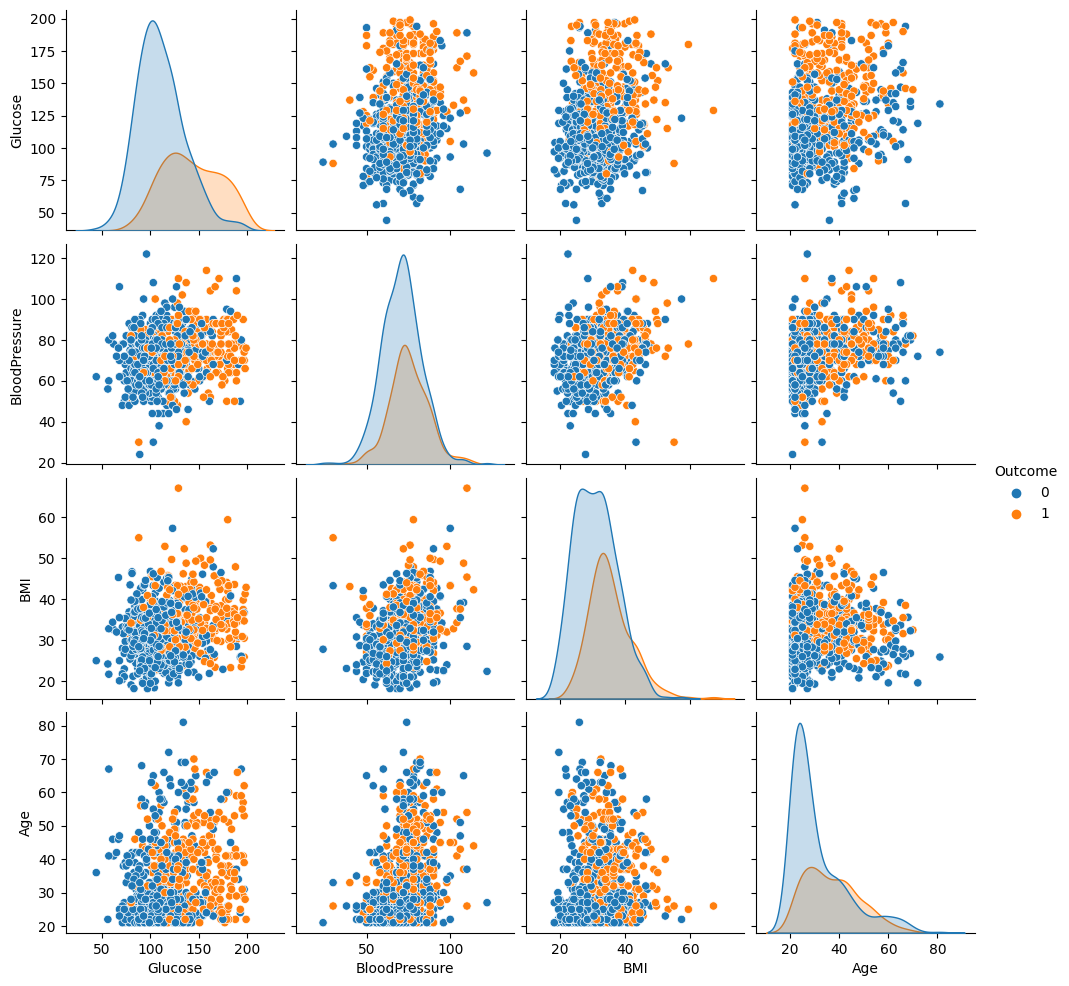

In [9]:
# Pairplot for Selected Features
selected_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
sns.pairplot(data=data, vars=selected_features, hue="Outcome")
plt.show()
